In [1]:
from visualization import visualize
from utils import load_as_dataframe
from load_model import boost_predict
import numpy as np
import os
import json
from matplotlib import pyplot as plt

C:\Users\HP\anaconda3\envs\radar\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


100%|██████████| 60/60 [00:00<00:00, 124.76it/s]
C:\Users\HP\anaconda3\envs\radar\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


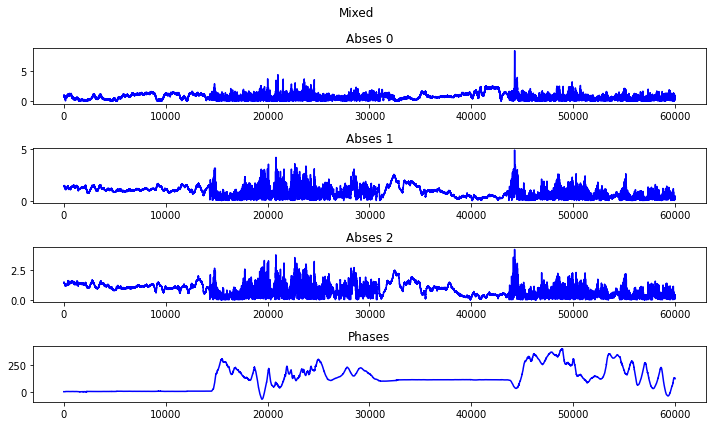

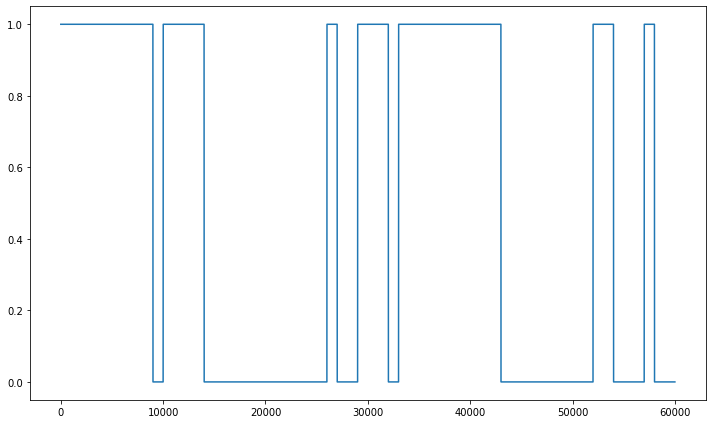

In [2]:
figsize = (10, 6)

folder = 'data'
subfolder = 'mixed'
filename = 'mixed_farness_2_moving_0_radardata_2022_05_07_19_38_09.npz'

title = 'Mixed'
color = 'blue'

fig = visualize(os.path.join(folder, subfolder), filename, title, color, figsize=figsize)

df = load_as_dataframe(os.path.join(folder, subfolder), filename)

model_folder = 'boost_acc_96_2022_05_07_21_04_14'

pred = boost_predict(model_folder, df)

with open(os.path.join(model_folder, 'hyperparams.json'), 'r') as f:
    hyperparams = json.load(f)

pred_repeatd = np.repeat(pred, hyperparams['chunk_size'])
fig2 = plt.figure(figsize=figsize)
plt.plot(pred_repeatd)
fig2.tight_layout()